In [1]:
# Importing some libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("heart.csv") # loading the csv file into the df variable 
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
pd.set_option("display.float" , "{:.2f}".format) # this sets the float data to not display more than 2 values after the .
df.describe()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count 303.00 303.00 303.00    303.00 303.00 303.00   303.00   303.00 303.00   
mean   54.37   0.68   0.97    131.62 246.26   0.15     0.53   149.65   0.33   
std     9.08   0.47   1.03     17.54  51.83   0.36     0.53    22.91   0.47   
min    29.00   0.00   0.00     94.00 126.00   0.00     0.00    71.00   0.00   
25%    47.50   0.00   0.00    120.00 211.00   0.00     0.00   133.50   0.00   
50%    55.00   1.00   1.00    130.00 240.00   0.00     1.00   153.00   0.00   
75%    61.00   1.00   2.00    140.00 274.50   0.00     1.00   166.00   1.00   
max    77.00   1.00   3.00    200.00 564.00   1.00     2.00   202.00   1.00   

       oldpeak  slope     ca   thal  target  
count   303.00 303.00 303.00 303.00  303.00  
mean      1.04   1.40   0.73   2.31    0.54  
std       1.16   0.62   1.02   0.61    0.50  
min       0.00   0.00   0.00   0.00    0.00  
25%       0.00   1.00   0.00   2.00    0.00  
50%       0.80   1.00   0.00   2.00    1.00  
75%       1.60   2.00   1.00   3.00    1.00  
max       6.20   2.00   4.00   3.00    1.00

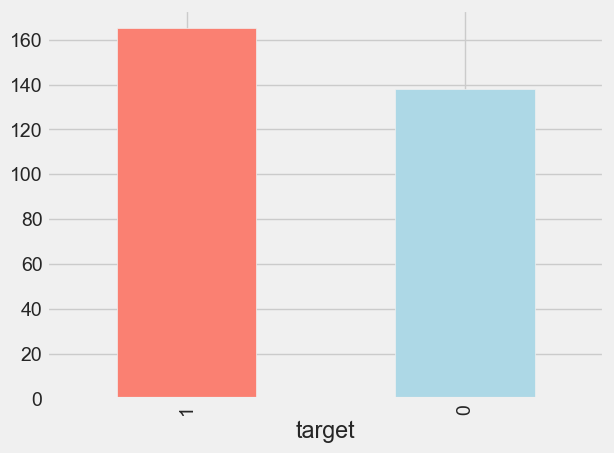

In [4]:
df.target.value_counts().plot(kind = "bar" , color = ["salmon" , "lightblue"] ); # this will show the number of values in bar graph

In [5]:
# checking if there is na values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
categorical_val = [] # creating an empty list to store any data
continous_val = []

for column in df.columns : # loop to iterate throuth the columns of the data frame
    print("=================================")
    print(f"{column} : {df[column].unique()}") # this will print the columns with values with only unique values 
    if len(df[column].unique()) <= 10 : # if there are less than 10 elements then those col will go to the categorical_val list
        categorical_val.append(column)
    else : #else all the col will go to the continous_val list
        continous_val.append(column)  

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

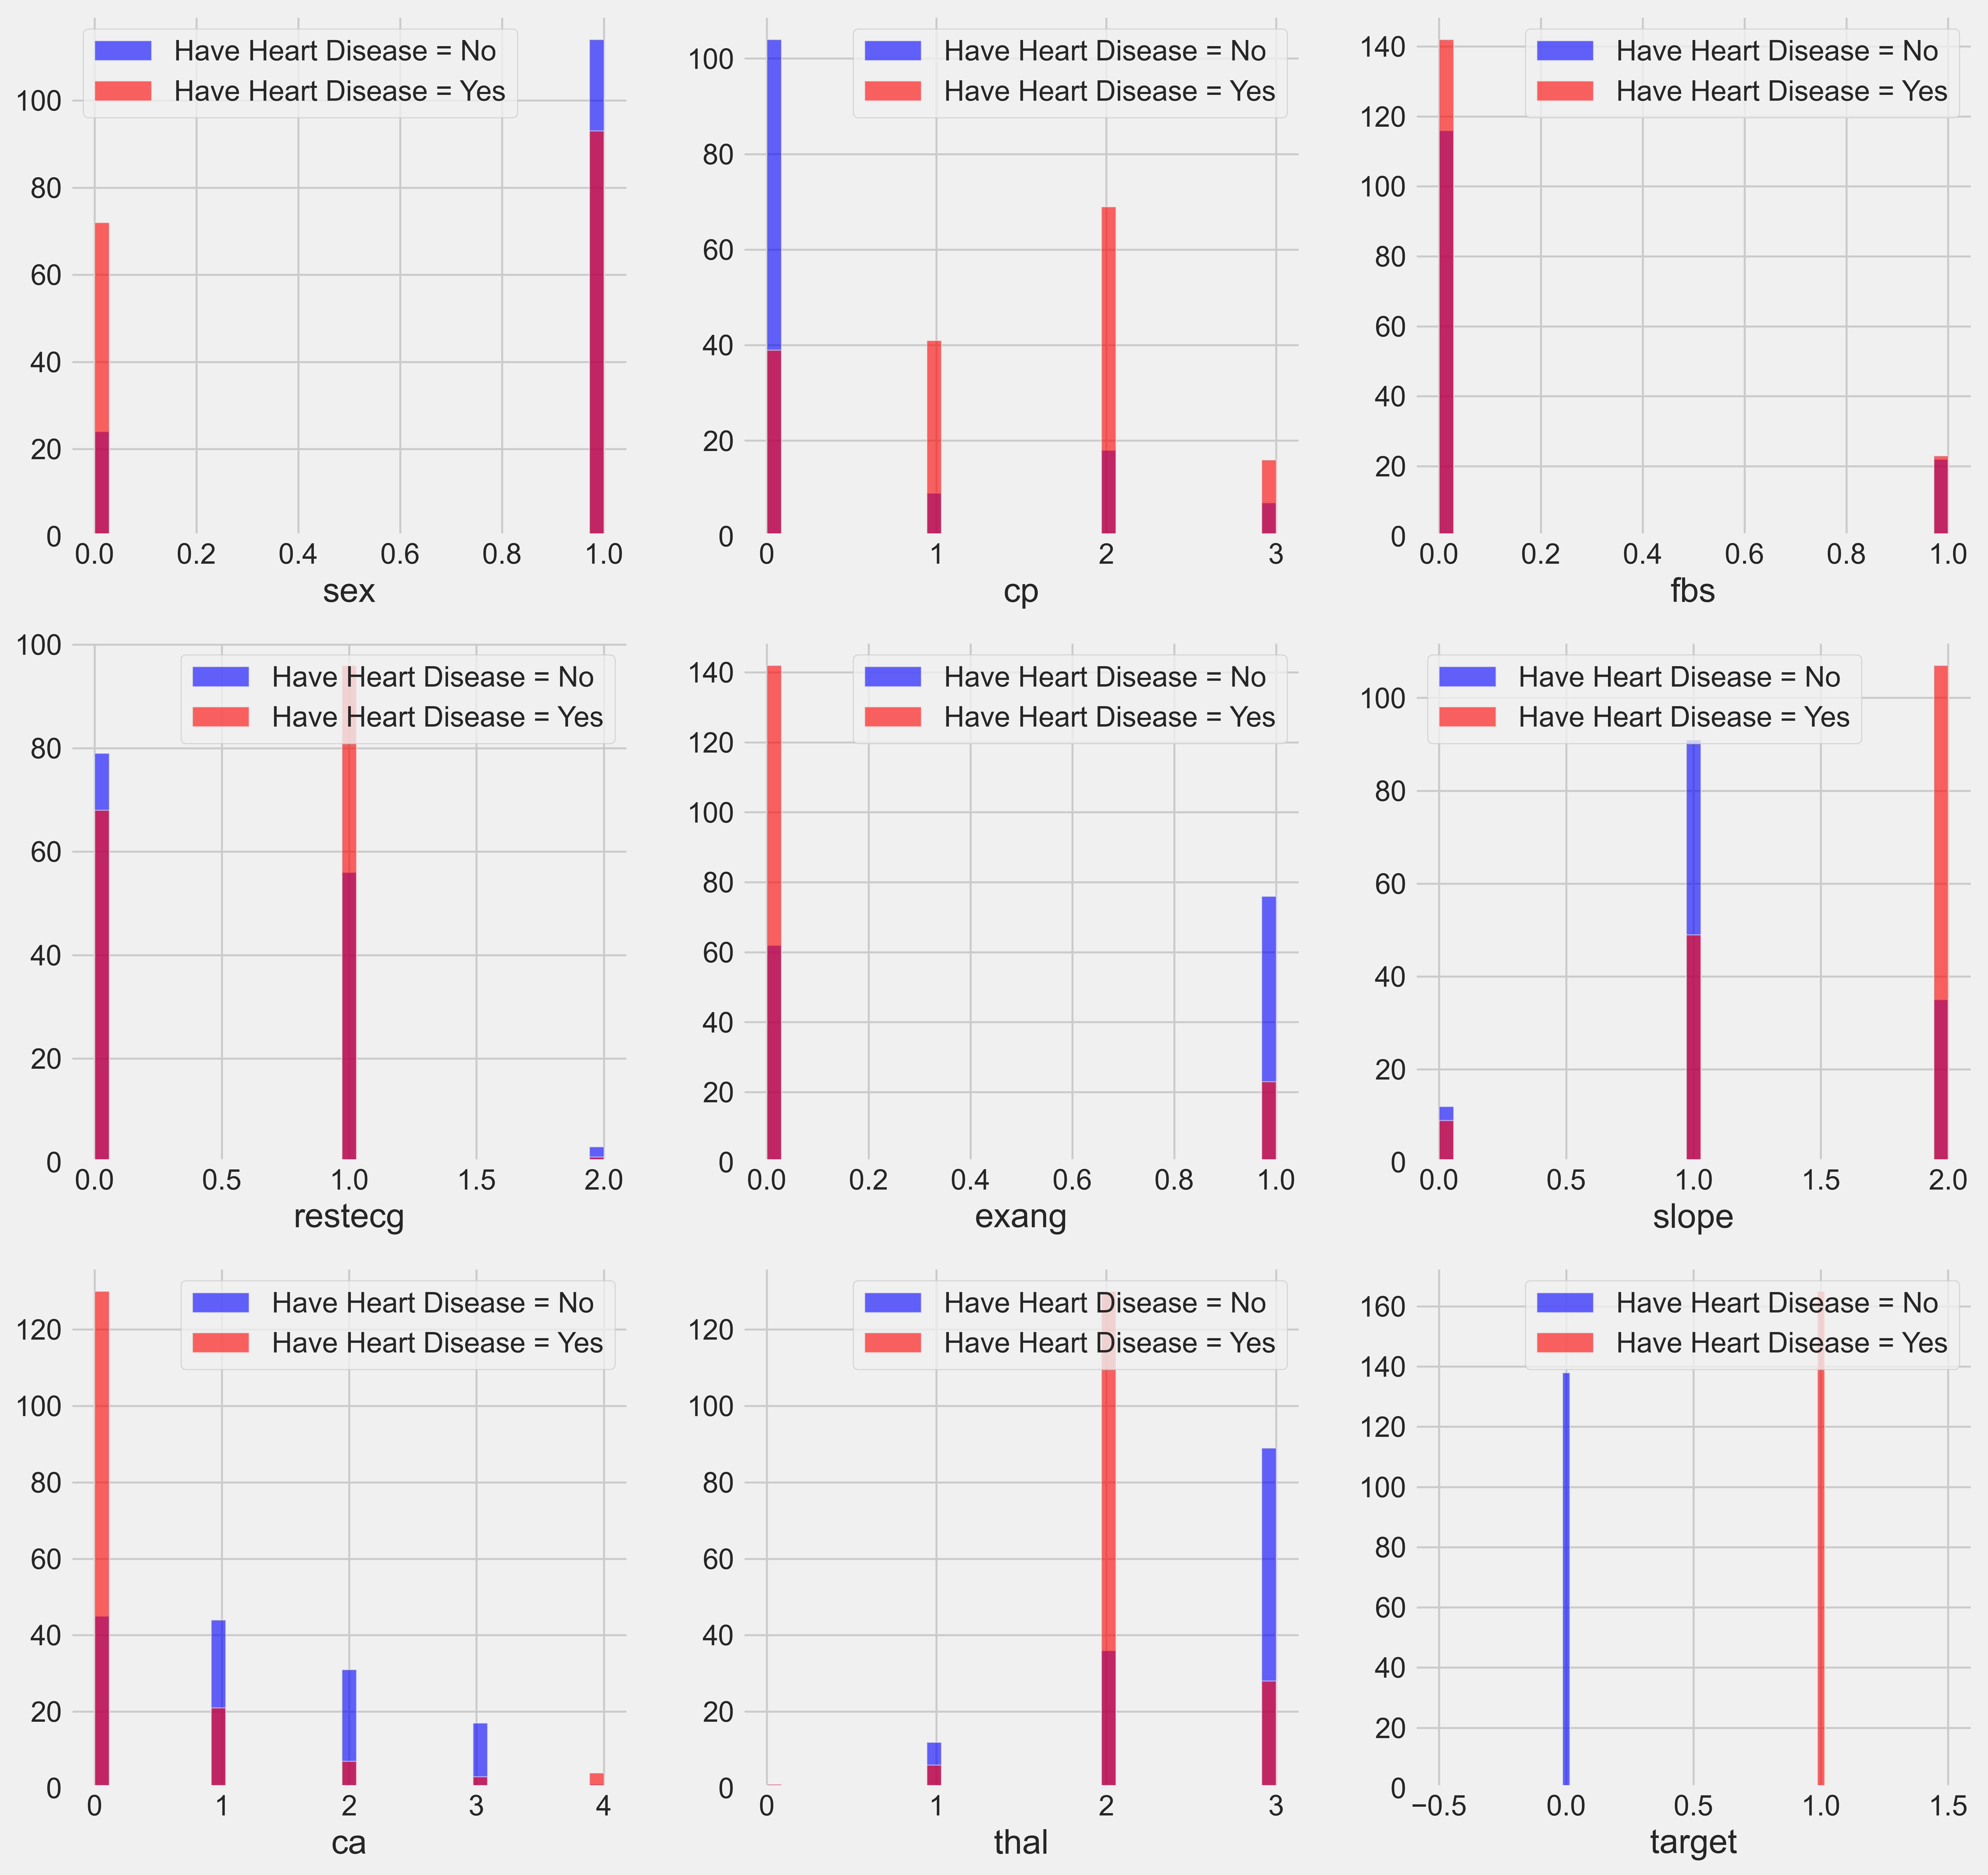

In [7]:
plt.figure(figsize = (15 , 15) , dpi = 500) # figsize is 15x15 and dot per inch is 500

for i,column in enumerate(categorical_val , 1) : # for loop to iterate thorough the categorical_val column
    plt.subplot(3 , 3 , i) # this will create 9 subplots as 3 , 3 means 9 and due to iterator this will go in sequence 
    df[df["target"] == 0] [column].hist(bins = 35 , color = "blue" , label = "Have Heart Disease = No" , alpha = 0.6) # creating a histogram
    df[df["target"] == 1] [column].hist(bins = 35 , color = "red" , label = "Have Heart Disease = Yes" , alpha = 0.6)
    plt.legend() # legend is the function used to show the info of the graph
    plt.xlabel(column) # labeling the x axis

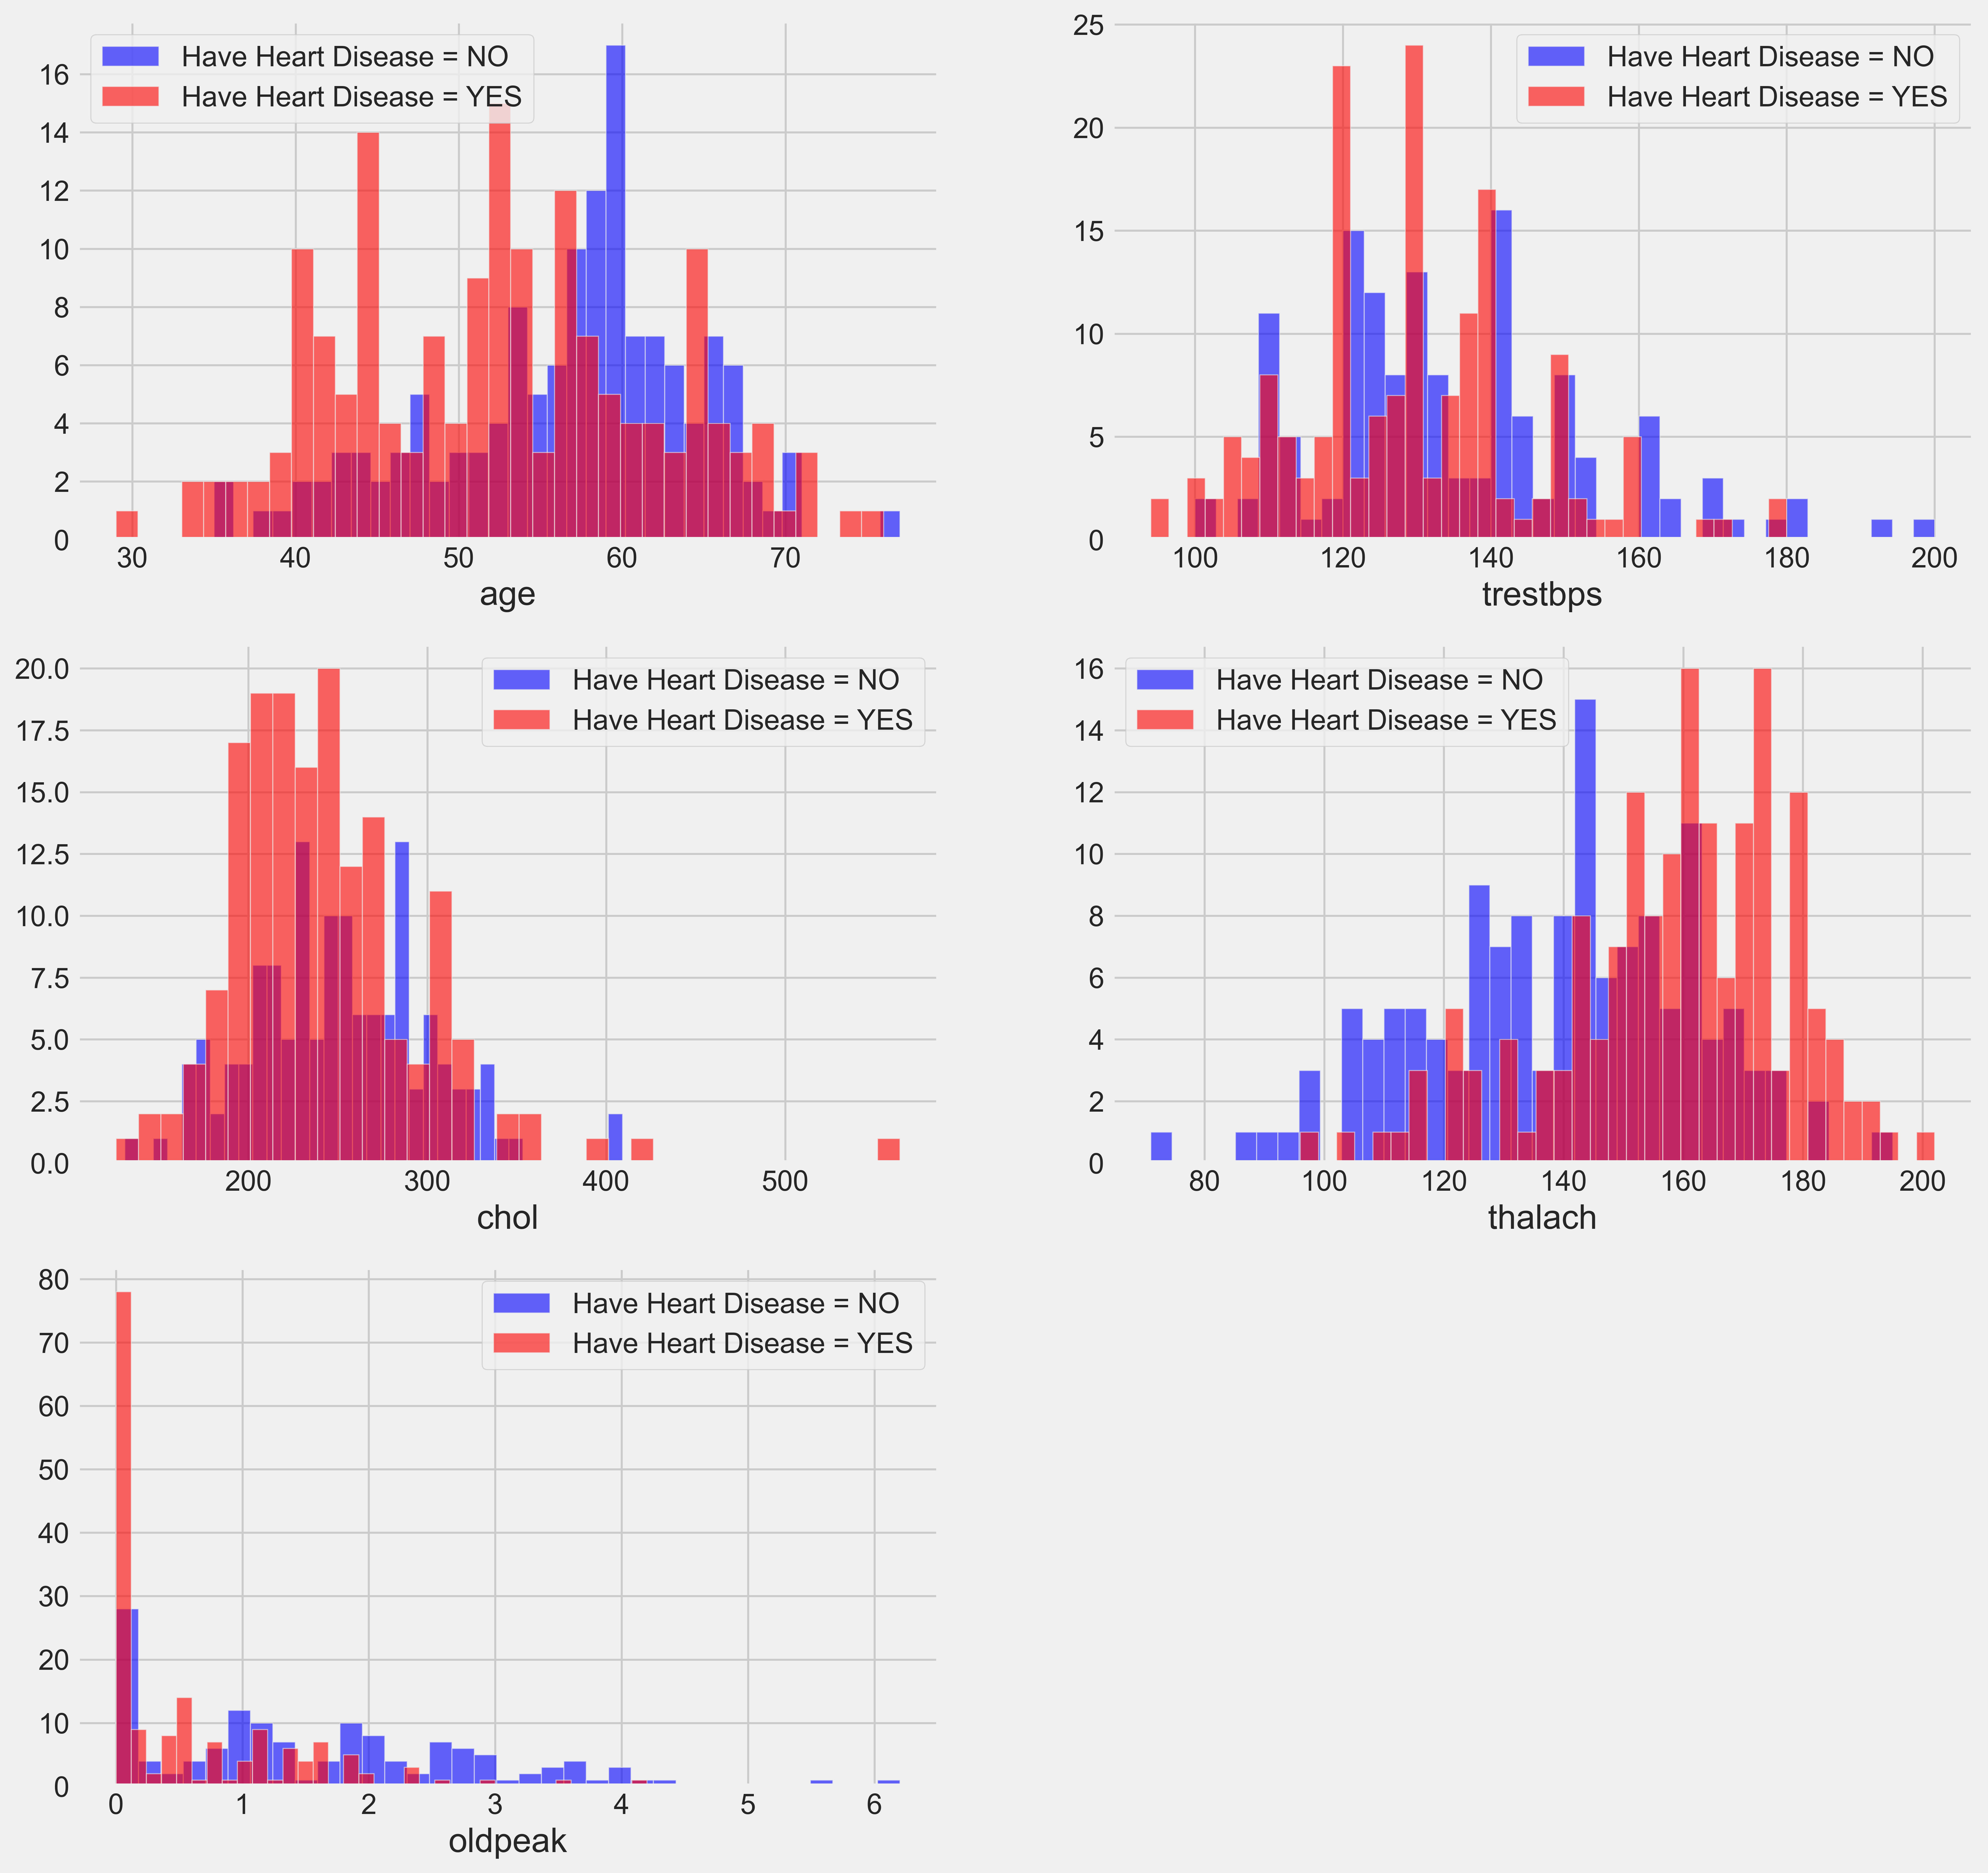

In [8]:
plt.figure(figsize=(15, 15) , dpi = 500)

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

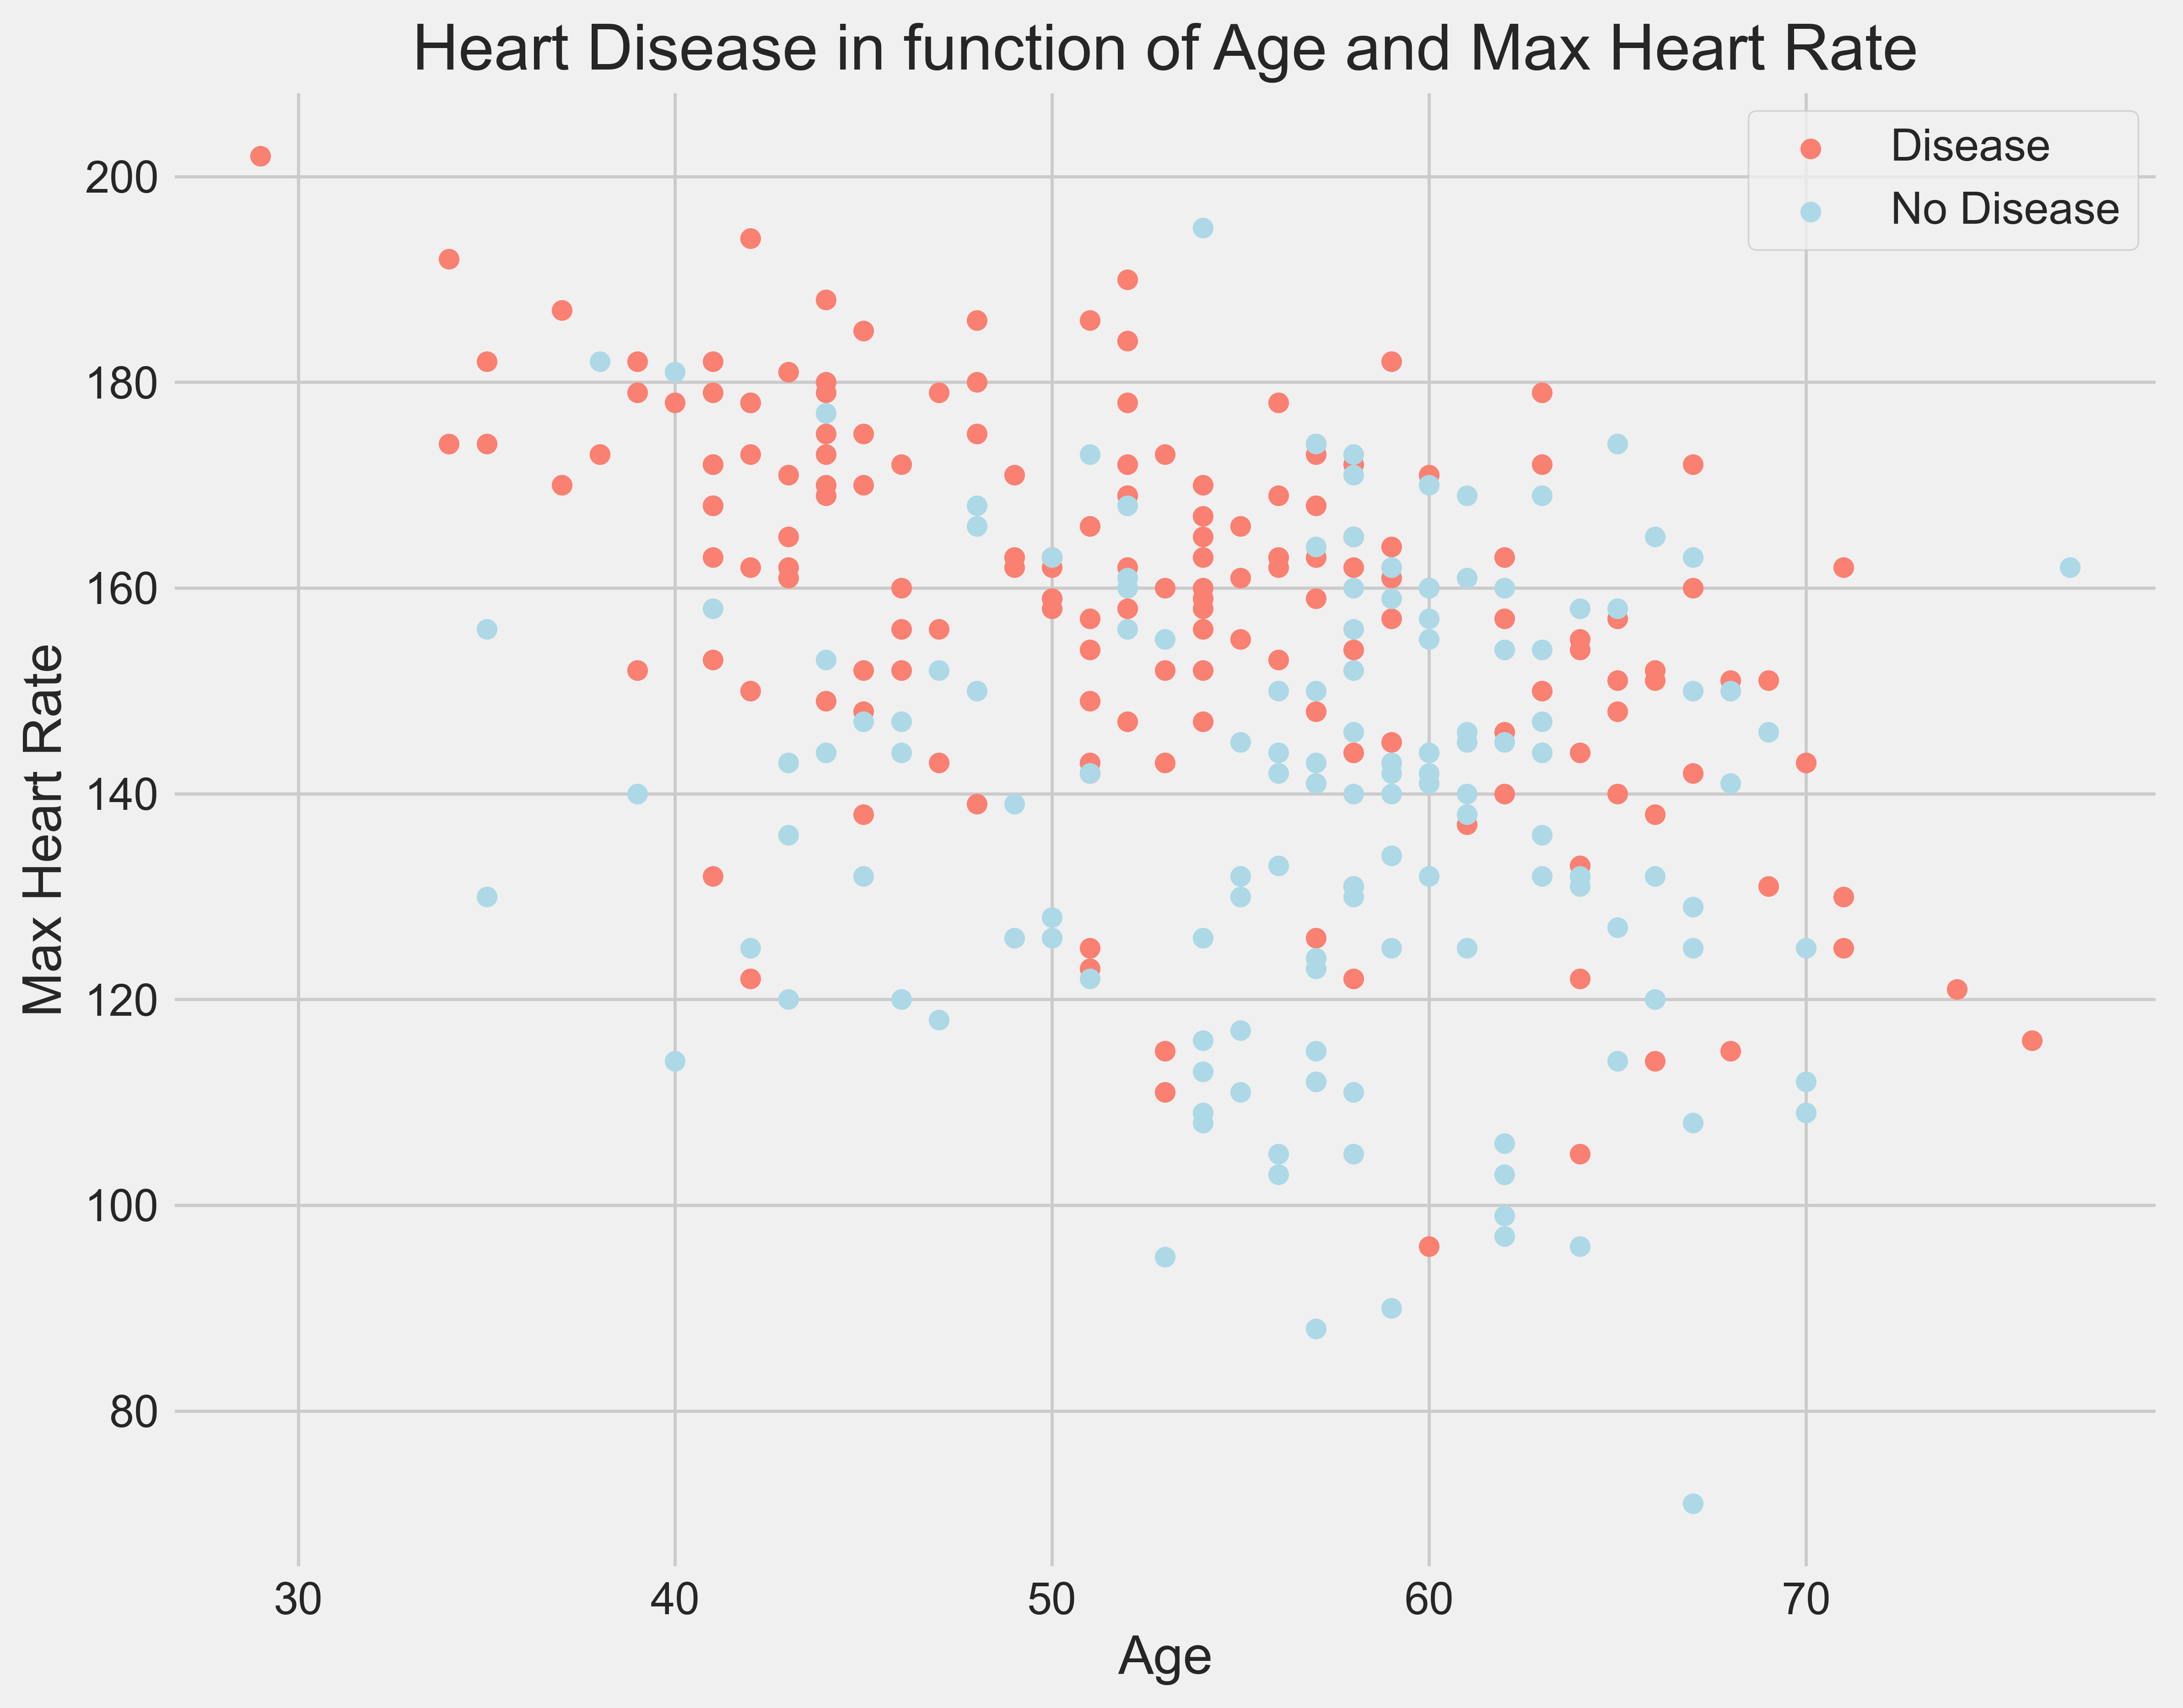

In [9]:
# Create another figure
plt.figure(figsize=(10, 8) , dpi = 500)

# Scatter with postivie examples
plt.scatter(df.age[df.target==1] , df.thalach[df.target==1] , c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0] , df.thalach[df.target==0] , c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

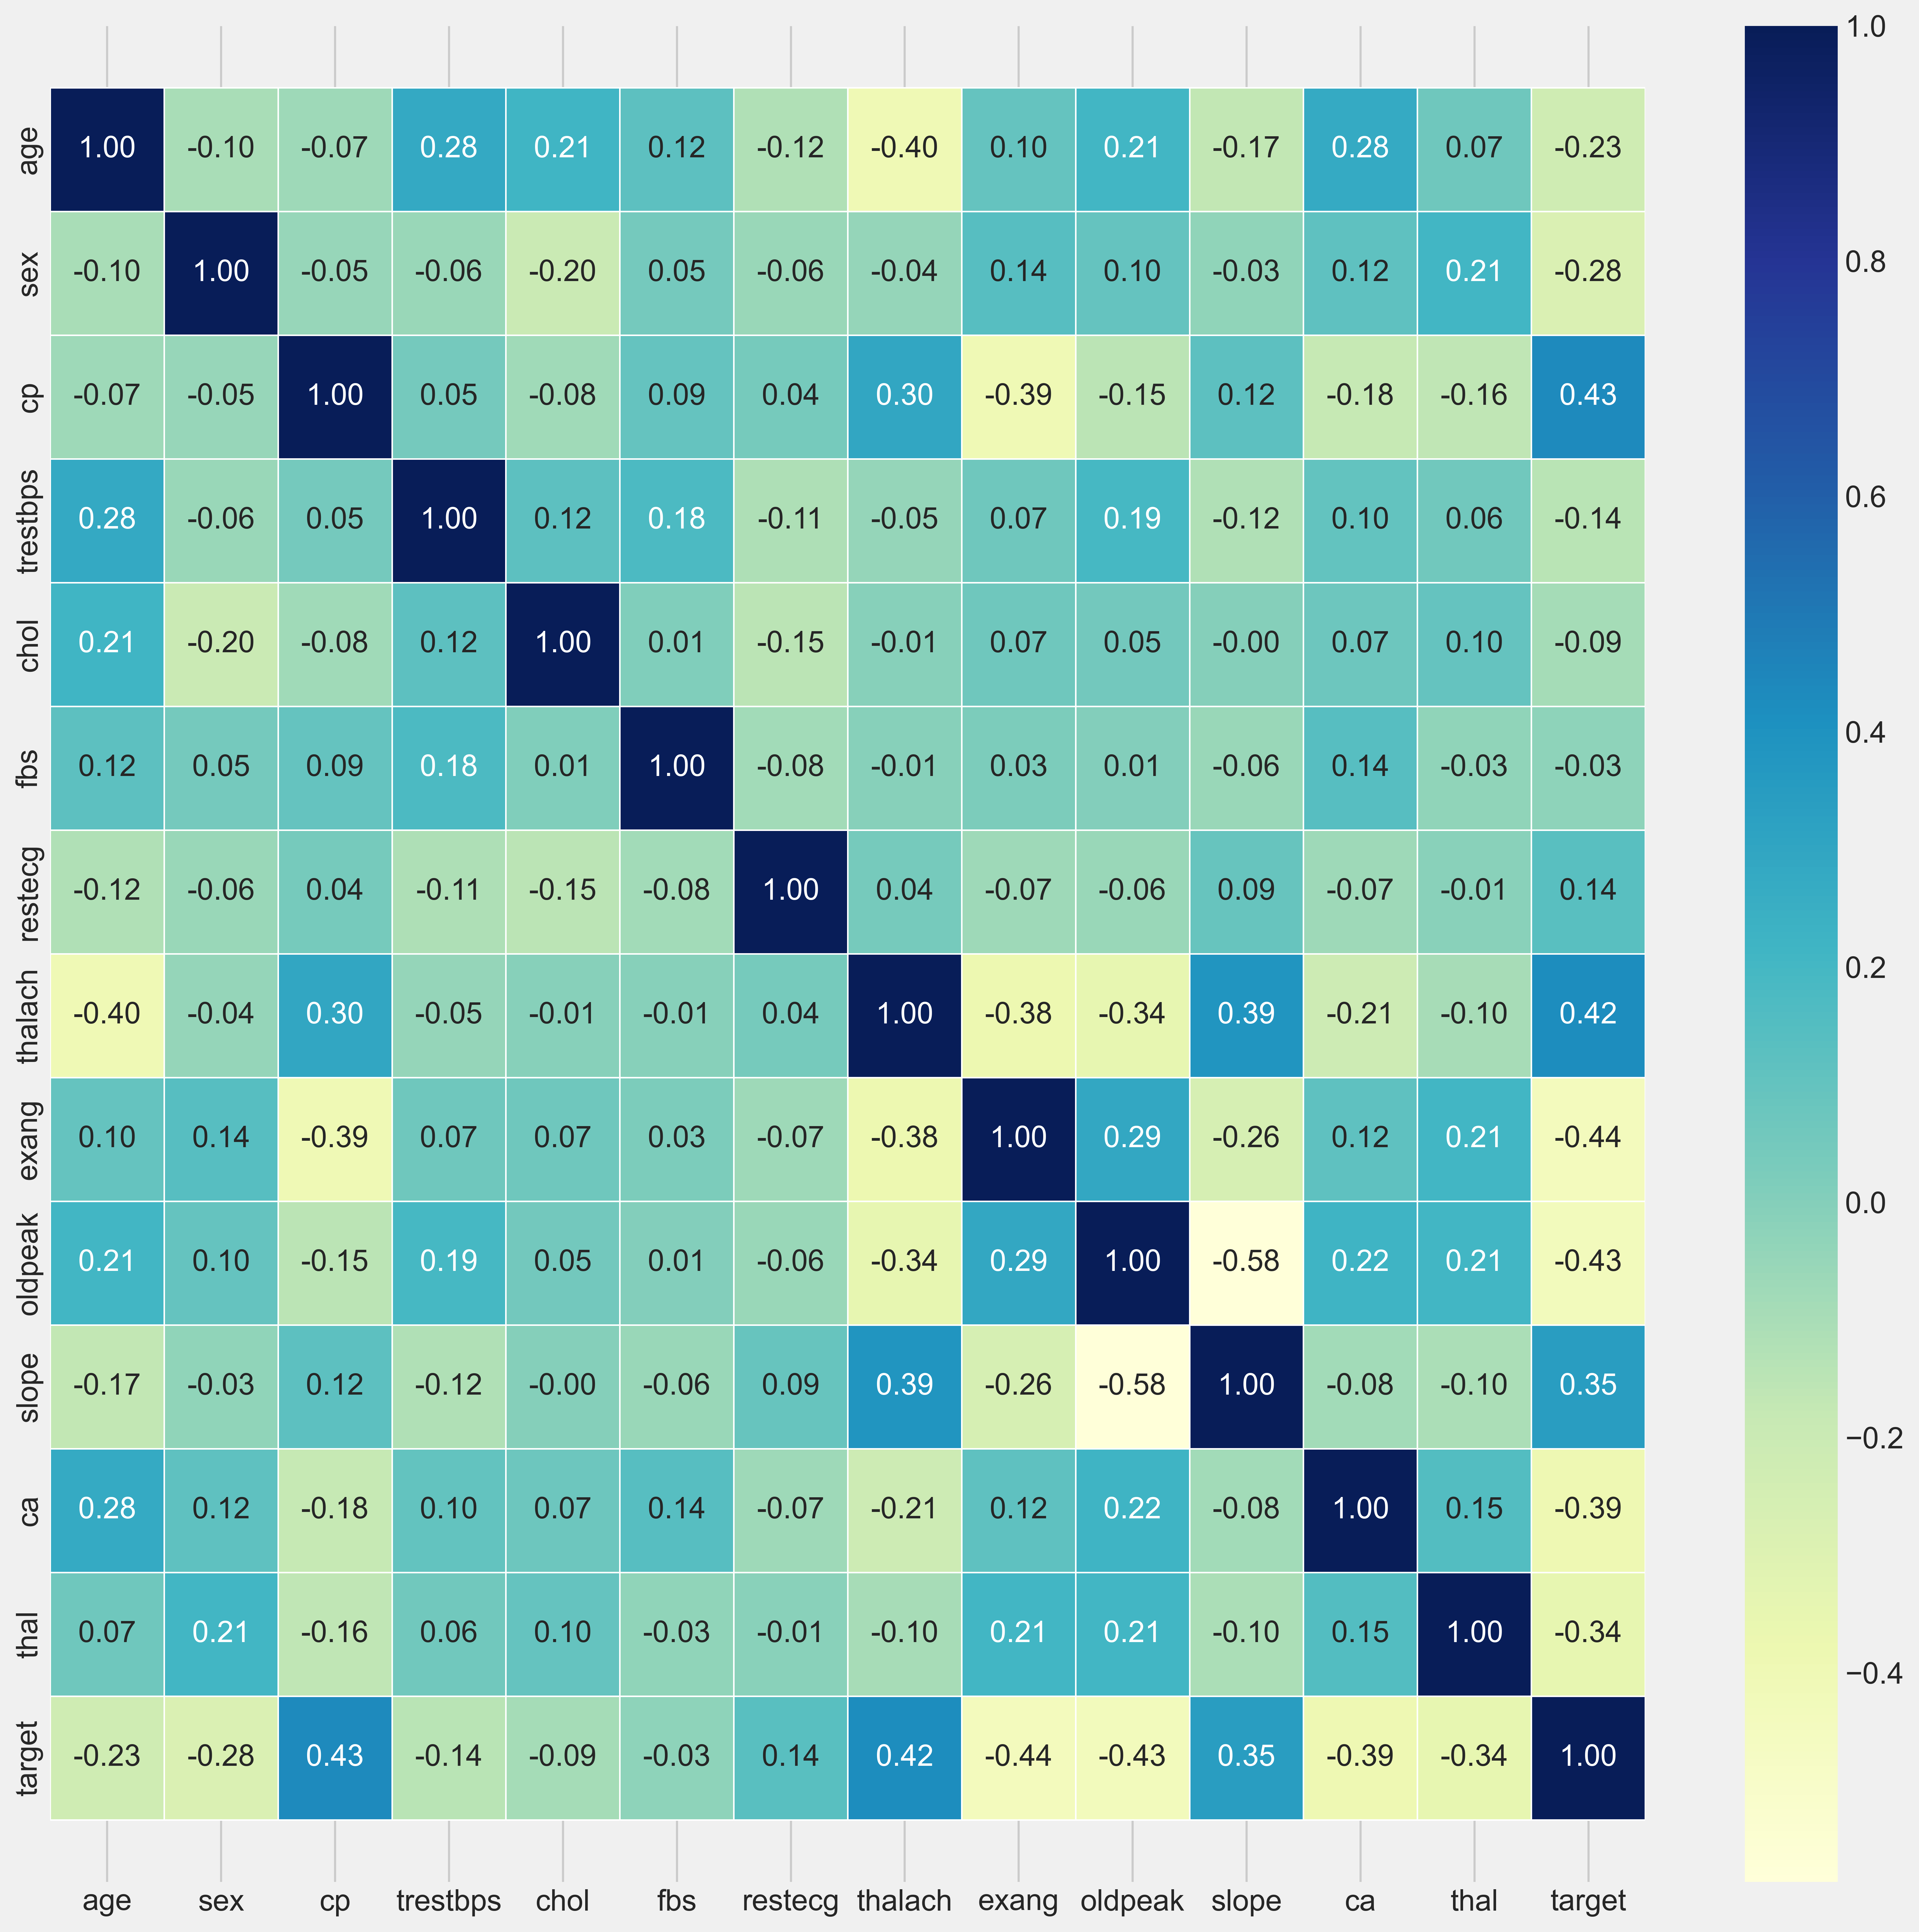

In [10]:
corr_matrix = df.corr() # this will create the correlation between different features
fig, ax = plt.subplots(figsize=(15, 15) , dpi = 500)  
ax = sns.heatmap(corr_matrix , annot=True , linewidths=0.5 , fmt=".2f", cmap="YlGnBu"); # creating a heat map
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

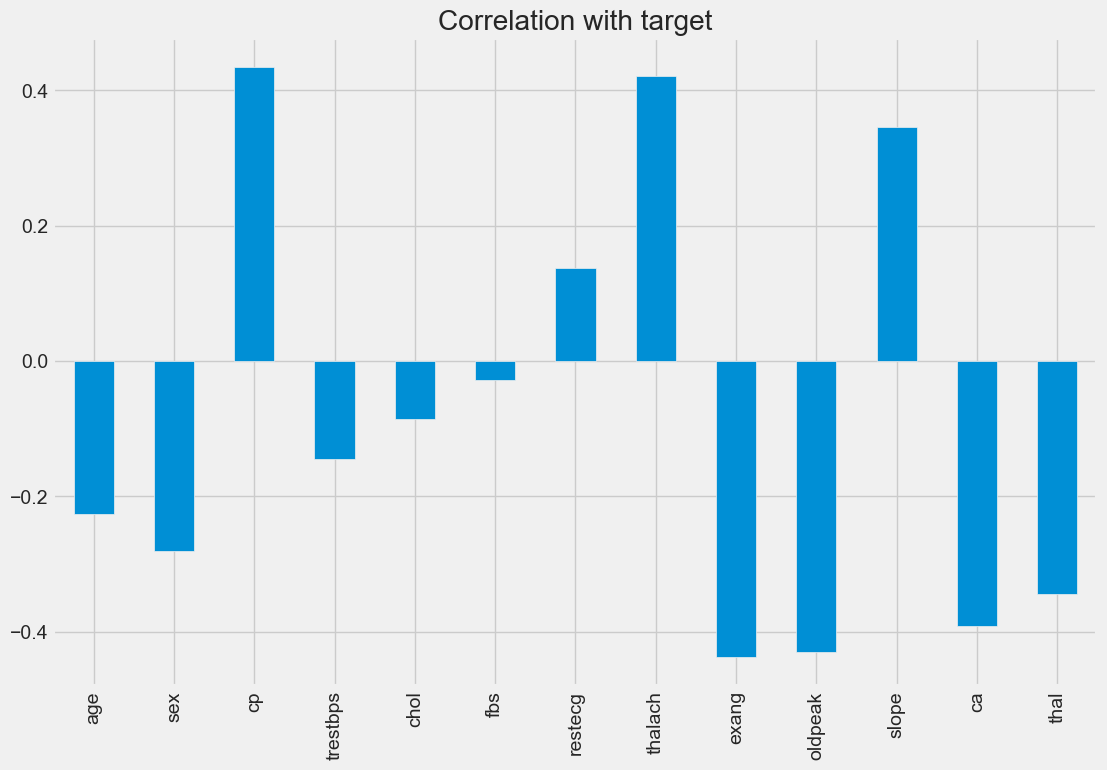

In [11]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8) , title="Correlation with target" ); # crating a corretaion graph

In [12]:
categorical_val.remove("target") # list function remove will remove the target feature from categirical_val list 
dataset = pd.get_dummies(df , columns = categorical_val) # converts categorical data into dummy variables
dataset

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1   cp_0  \
0     63       145   233      150     2.30       1  False   True  False   
1     37       130   250      187     3.50       1  False   True  False   
2     41       130   204      172     1.40       1   True  False  False   
3     56       120   236      178     0.80       1  False   True  False   
4     57       120   354      163     0.60       1   True  False   True   
..   ...       ...   ...      ...      ...     ...    ...    ...    ...   
298   57       140   241      123     0.20       0   True  False   True   
299   45       110   264      132     1.20       0  False   True  False   
300   68       144   193      141     3.40       0  False   True   True   
301   57       130   131      115     1.20       0  False   True   True   
302   57       130   236      174     0.00       0   True  False  False   

      cp_1  ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  \
0    False  ...    False   True  False  False  False  False   False    True   
1    False  ...    False   True  False  False  False  False   False   False   
2     True  ...     True   True  False  False  False  False   False   False   
3     True  ...     True   True  False  False  False  False   False   False   
4    False  ...     True   True  False  False  False  False   False   False   
..     ...  ...      ...    ...    ...    ...    ...    ...     ...     ...   
298  False  ...    False   True  False  False  False  False   False   False   
299  False  ...    False   True  False  False  False  False   False   False   
300  False  ...    False  False  False   True  False  False   False   False   
301  False  ...    False  False   True  False  False  False   False   False   
302   True  ...    False  False   True  False  False  False   False   False   

     thal_2  thal_3  
0     False   False  
1      True   False  
2      True   False  
3      True   False  
4      True   False  
..      ...     ...  
298   False    True  
299   False    True  
300   False    True  
301   False    True  
302    True   False  

[303 rows x 31 columns]

In [13]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler() # StandardScaler is a preprocessing technique used for removing the mean and scaling to unit variance
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # these are columns we want to standard scale 
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale]) # fit_transform will apply the process on the data frame

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# this is the helping function for printing the accuracy , calssification report , confusion metrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1) # this will put the whole data frame in x varilable except target col
y = dataset.target # var y will have only the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # splitting the data 

In [40]:
# for this model we will be using logistic regression 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear') 
lr_clf.fit(X_train, y_train) # applying the ligistic regression 

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True) # calling the print function 
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [42]:
# get feature names
feature_names = X.columns

# get the coefficients
coefficients = lr_clf.coef_[0]

# create a data frame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by their absolute coefficient values
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
#printing the values
print(feature_importance)


      Feature  Coefficient  Absolute Coefficient
21       ca_0         1.65                  1.65
7        cp_0        -1.07                  1.07
23       ca_2        -1.03                  1.03
29     thal_3        -1.00                  1.00
20    slope_2         0.71                  0.71
9        cp_2         0.70                  0.70
10       cp_3         0.68                  0.68
19    slope_1        -0.58                  0.58
6       sex_1        -0.55                  0.55
28     thal_2         0.55                  0.55
17    exang_1        -0.55                  0.55
22       ca_1        -0.54                  0.54
4     oldpeak        -0.50                  0.50
5       sex_0         0.45                  0.45
16    exang_0         0.45                  0.45
8        cp_1        -0.41                  0.41
14  restecg_1         0.37                  0.37
27     thal_1         0.33                  0.33
13  restecg_0        -0.28                  0.28
24       ca_3       

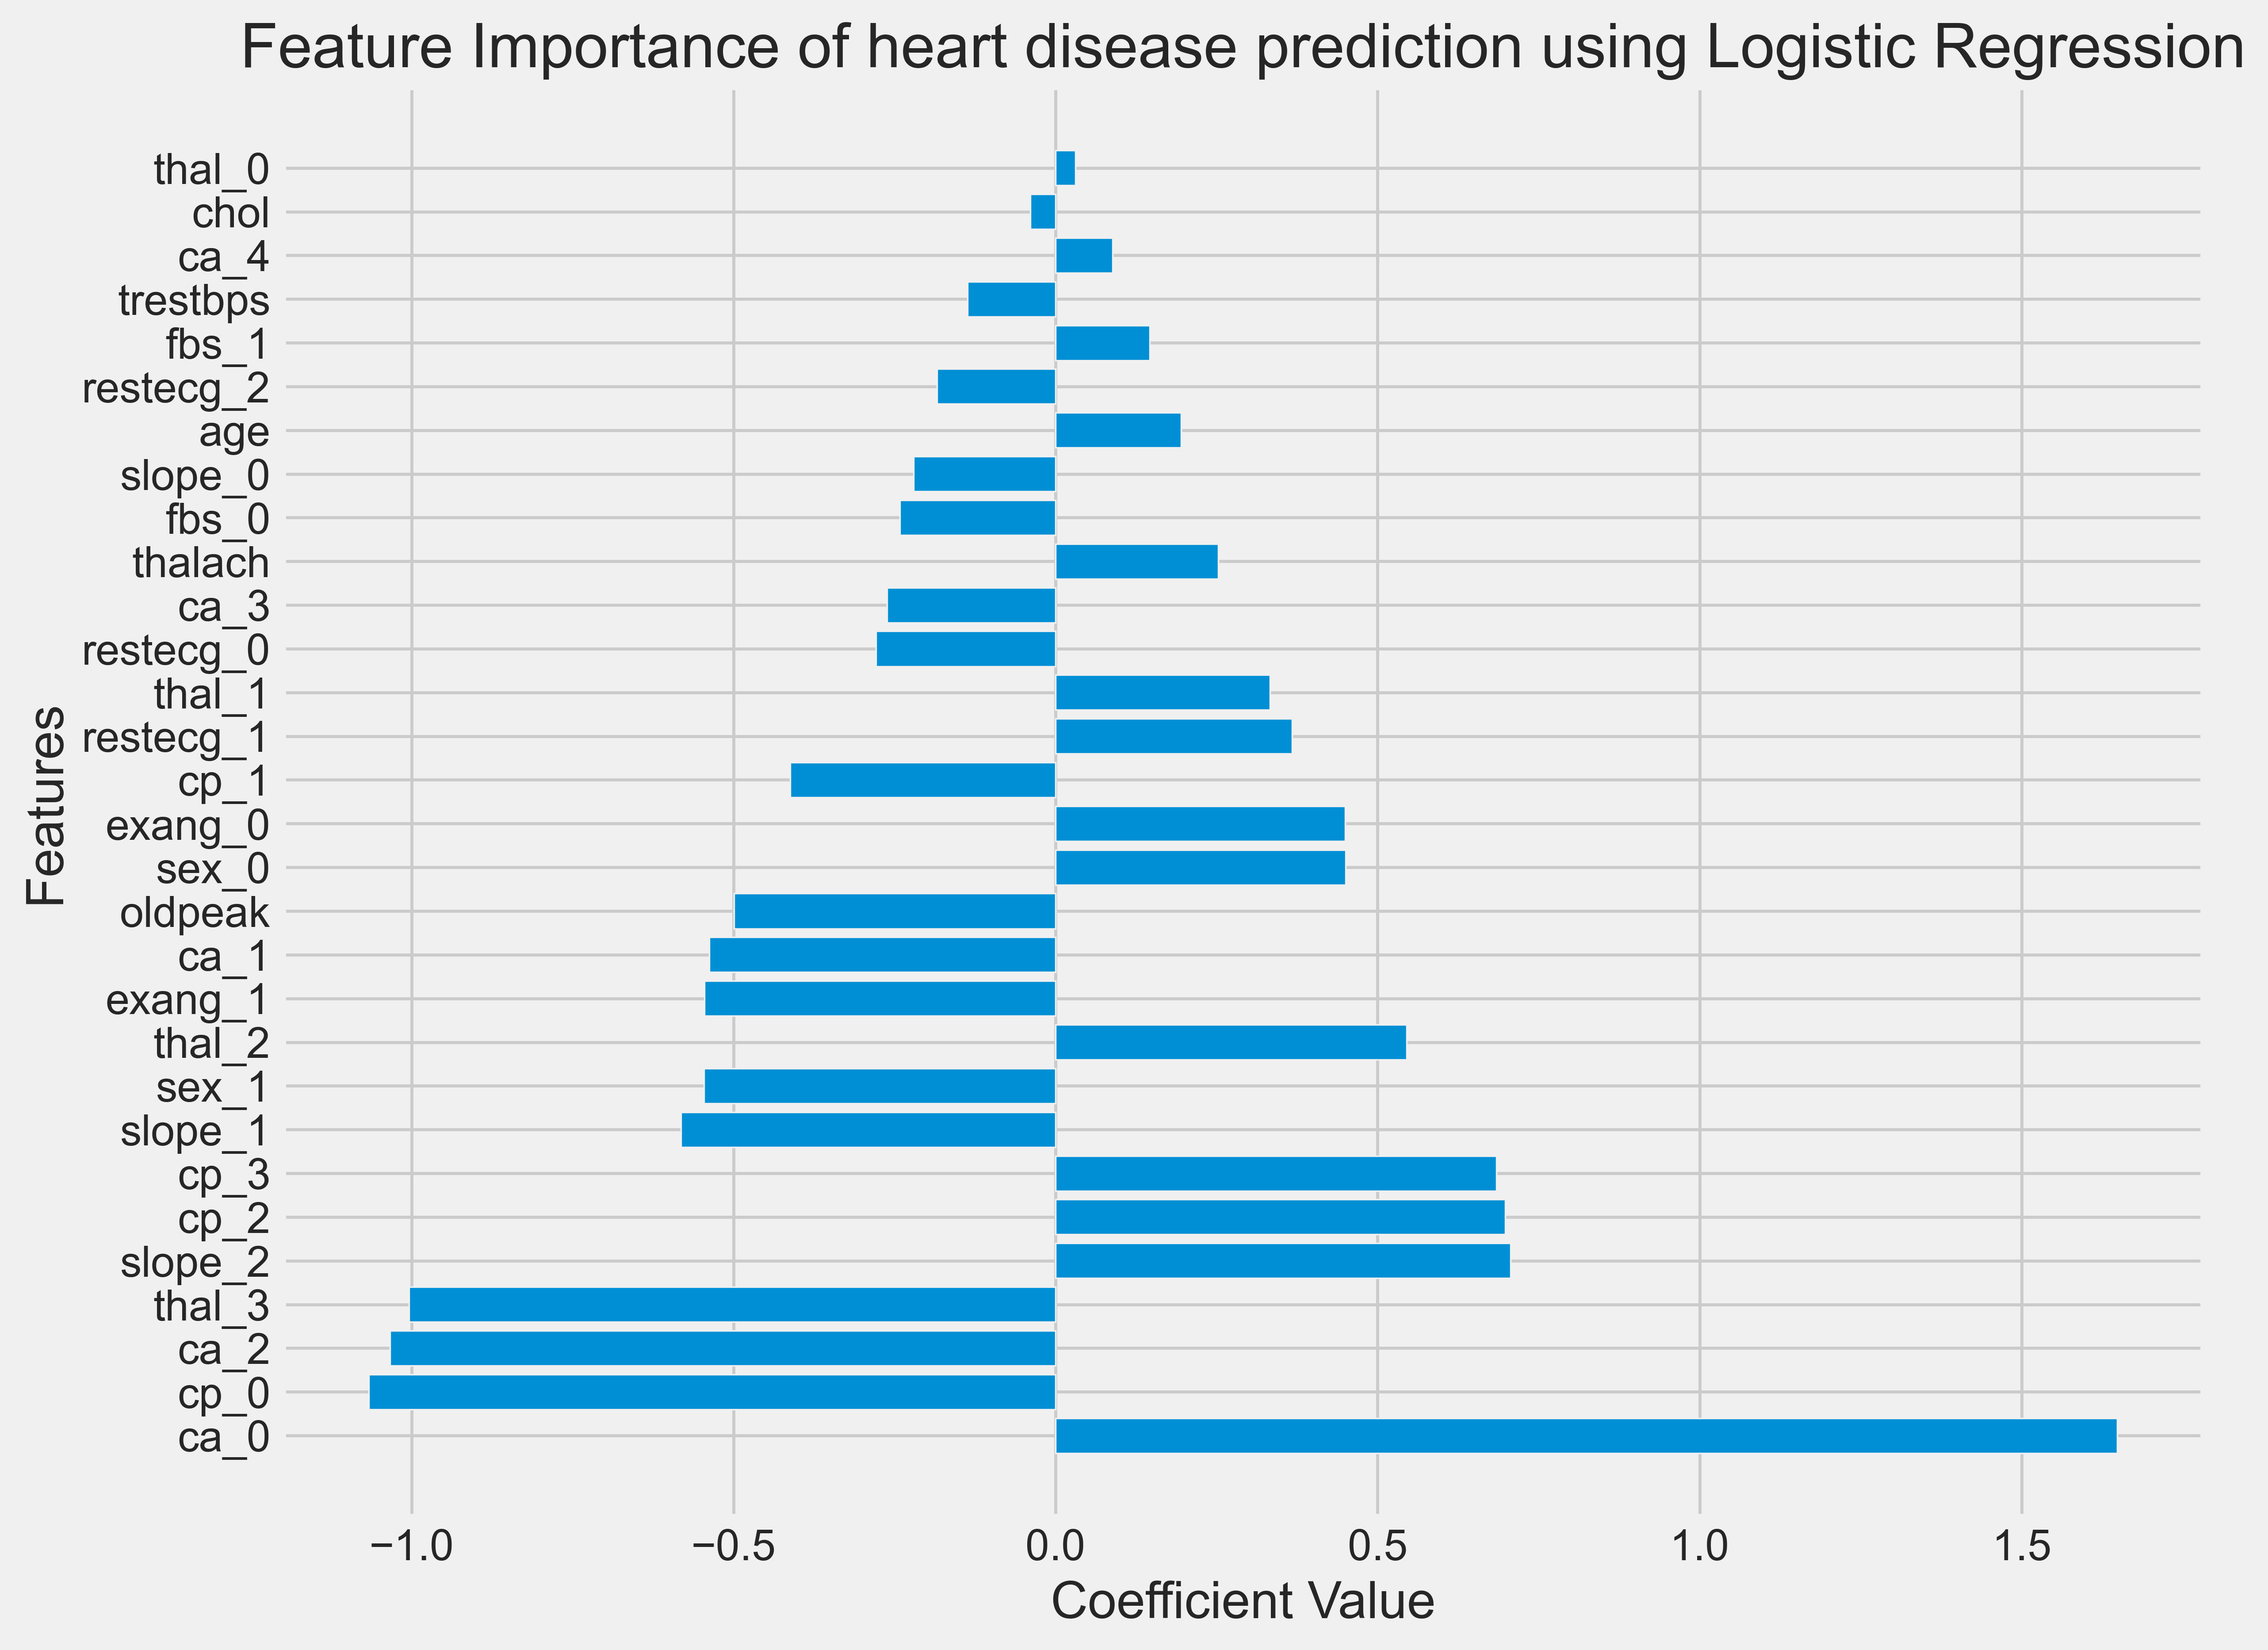

In [44]:
plt.figure(figsize=(10, 8) , dpi = 500) # setting the plot size and dots to display per inch 
plt.barh(feature_importance['Feature'], feature_importance['Coefficient']) # this will plot the bar graph 
plt.ylabel("Features") #setting the y label
plt.xlabel("Coefficient Value") # setting the x label
plt.title("Feature Importance of heart disease prediction using Logistic Regression") # setting the title of the graph 
plt.show() # printing the graph